# Problem 1

In [1]:
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt

In [2]:
# Data Loading
X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
X,Y = ml.shuffleData(X,Y)
# print(type(X), type(Y)) # class 'numpy.ndarray'
# X.shape (200000, 14) Y.shape (200000,)

1. Print the minimum, maximum, mean, and the variance of all of the features. 

In [3]:
print("minimum of features: ",X.min(axis=0))
print("maximum of features: ",X.max(axis=0))
print("mean of features: ",X.mean(axis=0))
print("variance of features: ",X.var(axis=0))

minimum of features:  [ 1.9300e+02  1.9000e+02  2.1497e+02  2.0542e+02  1.0000e+01  0.0000e+00
  0.0000e+00  0.0000e+00  6.8146e-01  0.0000e+00  0.0000e+00  0.0000e+00
  1.0074e+00 -9.9990e+02]
maximum of features:  [2.5300e+02 2.5050e+02 2.5250e+02 2.5250e+02 1.7130e+04 1.2338e+04
 9.2380e+03 3.5796e+01 1.9899e+01 1.1368e+01 2.1466e+01 1.4745e+01
 2.7871e+02 7.8250e+02]
mean of features:  [2.41797220e+02 2.28228260e+02 2.41796298e+02 2.33649299e+02
 2.86797959e+03 8.84073295e+02 1.73553355e+02 3.04719572e+00
 6.35196722e+00 1.92523232e+00 4.29379349e+00 2.80947178e+00
 1.03679146e+01 7.87334450e+00]
variance of features:  [8.26945619e+01 9.09573945e+01 3.57255796e+01 9.52608539e+01
 1.06194180e+07 3.25702985e+06 7.40656134e+05 7.42244277e+00
 6.33229913e+00 4.28448703e+00 4.04684087e+00 1.98218303e+00
 1.66679252e+02 1.41079679e+03]


In [4]:
Xt, Xva, Yt, Yva = ml.splitData(X, Y)
#Xt, Yt = Xtr[:5000], Ytr[:5000] # subsample for efficiency (you can go higher)
XtS, params = ml.rescale(Xt) # Normalize the features
XvS, _ = ml.rescale(Xva, params) # Normalize the features

Print the min, maximum, mean, and the variance of the rescaled features. 

In [5]:
print("Xtrain:")
print("minimum of features: ",XtS.min(axis=0))
print("maximum of features: ",XtS.max(axis=0))
print("mean of features: ",XtS.mean(axis=0))
print("variance of features: ",XtS.var(axis=0))
print("Xval:")
print("minimum of features: ",XvS.min(axis=0))
print("maximum of features: ",XvS.max(axis=0))
print("mean of features: ",XvS.mean(axis=0))
print("variance of features: ",XvS.var(axis=0))

Xtrain:
minimum of features:  [ -5.31562307  -4.01664032  -4.49633405  -2.89673811  -0.8759672
  -0.48825006  -0.20113904  -1.11634769  -2.25580688  -0.93080255
  -2.13504853  -1.9930641   -0.72736273 -27.19147853]
maximum of features:  [ 1.23326723  2.33869552  1.79296911  1.93402145  4.38385234  6.34499675
 10.52072852 11.97345415  5.39061316  4.57071943  8.54037977  8.46444146
 20.85009005 20.89807723]
mean of features:  [-1.41302876e-13 -4.70445072e-15 -3.43683321e-13 -8.90671413e-13
 -6.39377440e-17  8.97532049e-16 -5.09733922e-16 -4.97252701e-14
  1.02976110e-13  3.47608040e-14  4.25285675e-14  7.13267635e-14
 -7.83458576e-15 -5.25653184e-15]
variance of features:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Xval:
minimum of features:  [ -5.37065576  -4.01664032  -4.49633405  -2.89673811  -0.8759672
  -0.48825006  -0.20113904  -1.11634769  -2.1784456   -0.93080255
  -2.13504853  -1.9930641   -0.72583204 -27.19147853]
maximum of features:  [ 1.23326723  2.18112521  1.79296911  1.9

# Problem 2

## 2-1

In [6]:
def train_tree(md=15, mp=2,mlf=1):
    learner = ml.dtree.treeClassify(XtS, Yt, maxDepth=md, minParent=mp, minLeaf=mlf)
    probs = learner.predictSoft(XvS)
    t_auc = learner.auc(XtS, Yt)
    v_auc = learner.auc(XvS, Yva)
    return (t_auc, v_auc, learner.sz)

In [7]:
def draw_line(line1, line2, r1,r2):
    plt.figure(1)
    plt.xticks(list(range(0,r2-r1)), list(range(r1,r2)))
    plt.plot(line1,'b-',line2,'r-') 
    plt.draw()

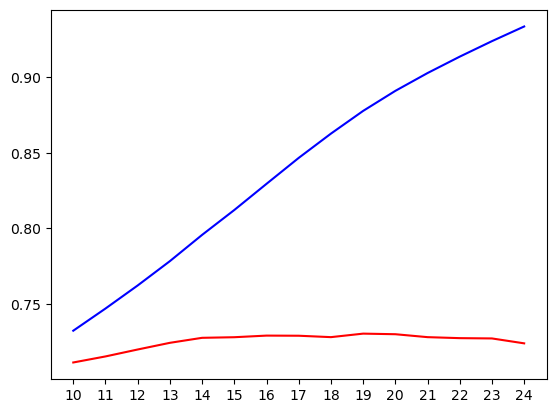

In [8]:
Train_AUC = []
Val_AUC = []
sz1 = []
for i in range(10,25):
    t,v,s = train_tree(md=i)
    Train_AUC.append(t)
    Val_AUC.append(v)
    sz1.append(s)
#print("{0:>15}: {1:.4f}".format('Train AUC', t_auc))
#print("{0:>15}: {1:.v 4f}".format('Validation AUC', v_auc))

draw_line(Train_AUC,Val_AUC,10,25)


## 2-2
I changed minLeaf from 1 to 5 

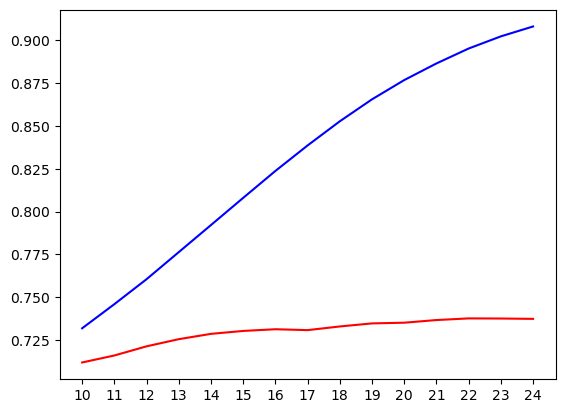

In [9]:
Train_AUC = []
Val_AUC = []
sz2 = []
for i in range(10,25):
    t,v,s = train_tree(mlf=5,md=i)
    Train_AUC.append(t)
    Val_AUC.append(v)
    sz2.append(s)
#print("{0:>15}: {1:.4f}".format('Train AUC', t_auc))
#print("{0:>15}: {1:.v 4f}".format('Validation AUC', v_auc))

draw_line(Train_AUC,Val_AUC,10,25)

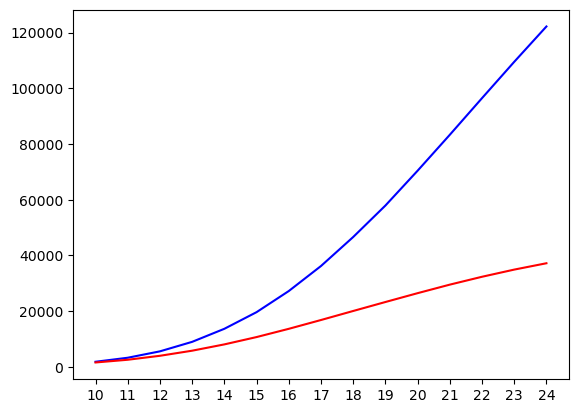

In [10]:
draw_line(sz1,sz2,10,25)

blue line: sz1 (number of nodes = 1), red line: sz2 (number of nodes = 5)

## 2-3

In [11]:
minParents = range(2,10,1) # Or something else
minLeaves = range(1,10,1) # Or something else
tr_auc = np.zeros((len(minParents),len(minLeaves)))
va_auc = np.zeros((len(minParents),len(minLeaves)))

for i,p in enumerate(minParents):
    for j,l in enumerate(minLeaves):
        t,v,_ = train_tree(md=17,mp=p,mlf=l)
        tr_auc[i][j] = t # train learner using k and a
        va_auc[i][j] = v

In [12]:
def plot_auc(auc):
    f, ax = plt.subplots(1, 1, figsize=(8, 5))
    cax = ax.matshow((auc), interpolation='nearest')
    f.colorbar(cax)
    ax.set_xticklabels(['']+list(minLeaves))
    ax.set_yticklabels(['']+list(minParents))

    plt.show()

C:\Users\henry\AppData\Local\Temp\ipykernel_4592\2982939589.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+list(minLeaves))
C:\Users\henry\AppData\Local\Temp\ipykernel_4592\2982939589.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+list(minParents))


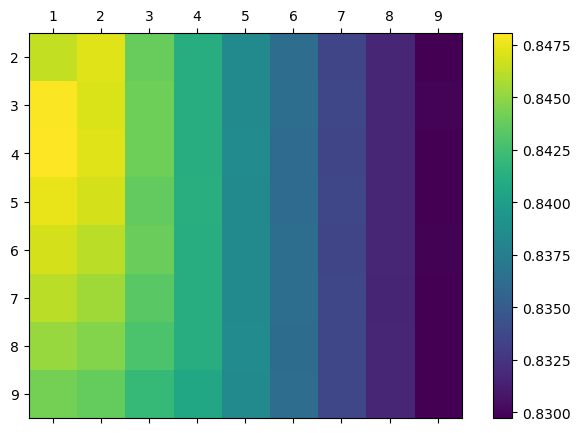

In [13]:
plot_auc(tr_auc)

C:\Users\henry\AppData\Local\Temp\ipykernel_4592\2982939589.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+list(minLeaves))
C:\Users\henry\AppData\Local\Temp\ipykernel_4592\2982939589.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+list(minParents))


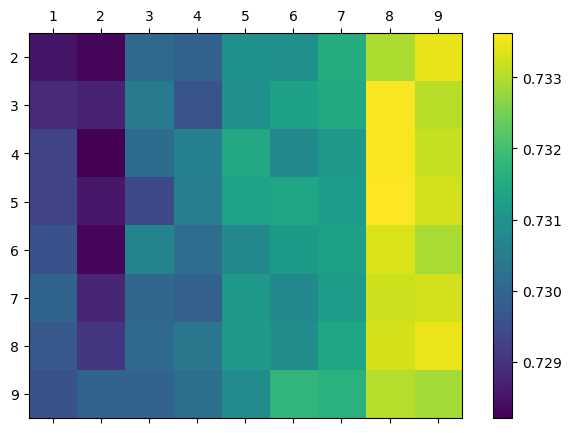

In [14]:
plot_auc(va_auc)

After this experiment, I recommended using minparents=5 and minleaves=3 ot 5, for this give us best results in validation auc

# Problem 3

In [15]:
import numpy as np
from datetime import datetime 

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

from torchvision import datasets, transforms

%matplotlib inline
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [16]:
torch.cuda.is_available()

True

In [17]:
# define transforms
transforms = transforms.Compose([transforms.Resize((32, 32)),
                                 transforms.ToTensor()])

# download and create datasets
train_dataset = datasets.MNIST(root='mnist_data', 
                               train=True, 
                               transform=transforms,
                               download=True)

valid_dataset = datasets.MNIST(root='mnist_data', 
                               train=False, 
                               transform=transforms)

## 3.1.1

Text(10, -2, 'The label is 5')

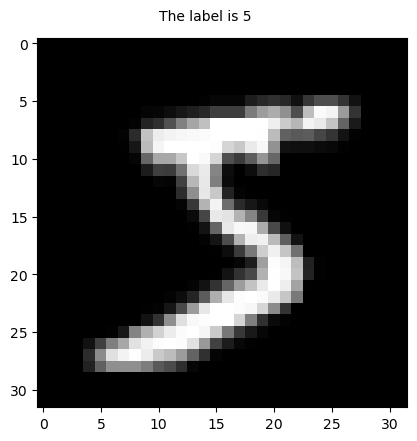

In [18]:
plt.imshow(train_dataset[0][0].squeeze(), cmap='gray')
plt.text(10, -2, 'The label is ' + str(train_dataset[0][1]))

In [19]:
train_dataset[0][0].shape

torch.Size([1, 32, 32])

In [20]:
# hyper parameters
RANDOM_SEED = 42
LEARNING_RATE = 0.001
BATCH_SIZE = 32
N_EPOCHS = 15

IMG_SIZE = 32
N_CLASSES = 10

## 3.1.2

In [21]:
# define the data loaders
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE, #32 imgs at once
                          shuffle=True)

valid_loader = DataLoader(dataset=valid_dataset, 
                          batch_size=BATCH_SIZE, 
                          shuffle=True)

## 3.1.3

In [22]:
def train(train_loader, model, criterion, optimizer):
    '''
    Train one epoch.
    '''

    model.train()
    running_loss = 0
    
    for X, y_true in train_loader:
        X = X.to(device)
        y_true = y_true.to(device)
        #X.shape 32,1,32,32
        #y.shape 32
        
        optimizer.zero_grad()
        
        # Forward pass
        y_hat, _ = model(X)
        
        loss = criterion(y_hat, y_true)
        running_loss += loss.item() * X.size(0)

        # Backward pass
        loss.backward()
        optimizer.step()
        
    epoch_loss = running_loss / len(train_loader.dataset)
    return model, optimizer, epoch_loss

## 3.1.4

In [23]:
def validate(valid_loader, model, criterion):
    '''
    Function for the validation step of the training loop.
    Returns the model and the loss on the test set.
    '''
   
    model.eval()
    running_loss = 0
    
    for X, y_true in valid_loader:
        
        X = X.to(device)
        y_true = y_true.to(device)

        # Forward pass and record loss
        
        y_hat, _ = model(X)
        loss = criterion(y_hat, y_true)
        running_loss += loss.item() * X.size(0)

    epoch_loss = running_loss / len(valid_loader.dataset)
        
    return model, epoch_loss

In [24]:
def training_loop(model, criterion, optimizer, train_loader, valid_loader, epochs, print_every=1):
    '''
    Function defining the entire training loop
    '''
    
    # set objects for storing metrics
    best_loss = 1e10
    train_losses = []
    valid_losses = []
    train_accs = []
    valid_accs = []
 
    # Train model
    for epoch in range(0, epochs):

        # training
        model, optimizer, train_loss = train(train_loader, model, criterion, optimizer)
        train_losses.append(train_loss)

        # validation
        with torch.no_grad():
            model, valid_loss = validate(valid_loader, model, criterion)
            valid_losses.append(valid_loss)

        if epoch % print_every == (print_every - 1):
            
            train_acc = get_accuracy(model, train_loader,)
            train_accs.append(train_acc)
            valid_acc = get_accuracy(model, valid_loader)
            valid_accs.append(valid_acc)
                
            print(f'{datetime.now().time().replace(microsecond=0)} '
                  f'Epoch: {epoch}\t'
                  f'Train loss: {train_loss:.4f}\t'
                  f'Valid loss: {valid_loss:.4f}\t'
                  f'Train accuracy: {100 * train_acc:.2f}\t'
                  f'Valid accuracy: {100 * valid_acc:.2f}')
    
    performance = {
        'train_losses':train_losses,
        'valid_losses': valid_losses,
        'train_acc': train_accs,
        'valid_acc':valid_accs
    }
    
    return model, optimizer, performance

## 3.1.5

In [25]:
def get_accuracy(model, data_loader):
    '''
    Function for computing the accuracy of the predictions over the entire data_loader
    '''
    
    correct_pred = 0 
    n = 0
    
    with torch.no_grad():
        model.eval()
        for X, y_true in data_loader:
            X = X.to(device)
            y_true = y_true.to(device)
            
            y_hat,y_prob = model(X)
            
            # print("yhat:",y_hat) #val from nnet
            # print("yprob:",y_prob) #normalized
            predicted_labels = torch.argmax(y_prob, 1) 
            # print("predicted_labels:", predicted_labels)
            
            n += y_true.size(0) # 32, same as y_true.shape[0]
            correct_pred += torch.eq(predicted_labels, y_true).sum()

    return float(correct_pred / n)


    
def plot_performance(performance):
    '''
    Function for plotting training and validation losses
    '''
    
    # temporarily change the style of the plots to seaborn 
    plt.style.use('seaborn')

    fig, ax = plt.subplots(1, 2, figsize = (16, 4.5))
    for key, value in performance.items():
        if 'loss' in key:
            ax[0].plot(value, label=key) 
        else:
            ax[1].plot(value, label=key) 
    ax[0].set(title="Loss  over epochs", 
            xlabel='Epoch',
            ylabel='Loss')
    ax[1].set(title="accuracy over epochs", 
            xlabel='Epoch',
            ylabel='Accuracy')
    ax[0].legend()
    ax[1].legend()
    plt.show()
    
    # change the plot style to default
    plt.style.use('default')    

## 3.2.1

In [26]:
class LeNet5(nn.Module):

    def __init__(self, n_classes):
        super(LeNet5, self).__init__()
        
        self.layer1 = nn.Sequential( # use nn.Sequential to build several mini-models
            # in_channels, out_channels, kernel_size, stride
            nn.Conv2d(1, 6, (5,5), 1), 
            nn.Tanh(),
            #kernel size, stride
            nn.AvgPool2d(2, 2) 
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, (5,5), 1),
            nn.Tanh(),
            nn.AvgPool2d(2, 2)
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(16,120,(5,5),1),
            nn.Tanh()
        )
        self.fc = nn.Sequential(
            nn.Linear(120, 84),
            nn.Tanh(),
            nn.Linear(84, n_classes)
        )


    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = torch.flatten(x, 1)
        logits = self.fc(x)
        
        probs = F.softmax(logits, dim=1)
        return logits, probs

## 3.2.2

In [27]:
class MLP(nn.Module):

    def __init__(self, layers):
        super(MLP, self).__init__()
        
        self.layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(layers[0],layers[1]),
            nn.Tanh(),
            nn.Linear(layers[1],layers[2]),
            nn.Tanh(),
            nn.Linear(layers[2],layers[3]),
            nn.Tanh(),
            nn.Linear(layers[3],layers[4])
        )
    def forward(self, x):
        logits = self.layer(x)
        probs = F.softmax(logits, dim=1)
        return logits, probs

## 3.3.1

In [28]:
torch.manual_seed(RANDOM_SEED)

LeNet5_model = LeNet5(N_CLASSES).to(device)
optimizer = torch.optim.Adam(LeNet5_model.parameters(), lr=LEARNING_RATE)
criterion = nn.CrossEntropyLoss()

In [29]:
LeNet5_model, optimizer, performance_1 = training_loop(LeNet5_model, criterion, optimizer, train_loader, valid_loader, N_EPOCHS)

15:29:15 Epoch: 0	Train loss: 0.2290	Valid loss: 0.1020	Train accuracy: 96.84	Valid accuracy: 96.81
15:29:39 Epoch: 1	Train loss: 0.0766	Valid loss: 0.0680	Train accuracy: 98.19	Valid accuracy: 97.94
15:30:02 Epoch: 2	Train loss: 0.0538	Valid loss: 0.0578	Train accuracy: 98.58	Valid accuracy: 98.22
15:30:26 Epoch: 3	Train loss: 0.0429	Valid loss: 0.0496	Train accuracy: 99.03	Valid accuracy: 98.42
15:30:49 Epoch: 4	Train loss: 0.0350	Valid loss: 0.0510	Train accuracy: 99.02	Valid accuracy: 98.36
15:31:12 Epoch: 5	Train loss: 0.0292	Valid loss: 0.0447	Train accuracy: 99.25	Valid accuracy: 98.68
15:31:35 Epoch: 6	Train loss: 0.0258	Valid loss: 0.0436	Train accuracy: 99.43	Valid accuracy: 98.76
15:31:59 Epoch: 7	Train loss: 0.0223	Valid loss: 0.0435	Train accuracy: 99.39	Valid accuracy: 98.81
15:32:22 Epoch: 8	Train loss: 0.0191	Valid loss: 0.0424	Train accuracy: 99.50	Valid accuracy: 98.66
15:32:45 Epoch: 9	Train loss: 0.0169	Valid loss: 0.0462	Train accuracy: 99.57	Valid accuracy: 98.62


C:\Users\henry\AppData\Local\Temp\ipykernel_4592\1716291042.py:35: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


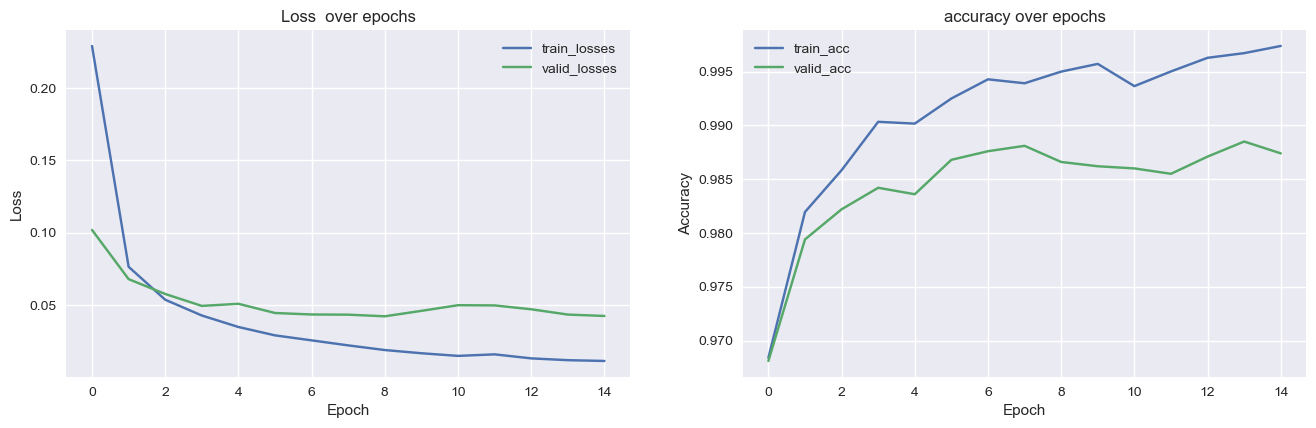

In [30]:
plot_performance(performance_1)

The loss of training data is dropping from 0.2 to 0.01, while the loss of testing data is dropping from 0.1 to 0.04

The accuracy of training data is rising from 0.968 to 0.997, while the loss of testing data is rising from 0.968 to 0.987

## 3.3.2

In [31]:
torch.manual_seed(RANDOM_SEED)
layers = [1024, 256, 64, 16, N_CLASSES]
MLP_model = MLP(layers).to(device)
print(MLP_model)
optimizer = torch.optim.Adam(MLP_model.parameters(), lr=LEARNING_RATE)
criterion = nn.CrossEntropyLoss()

MLP(
  (layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1024, out_features=256, bias=True)
    (2): Tanh()
    (3): Linear(in_features=256, out_features=64, bias=True)
    (4): Tanh()
    (5): Linear(in_features=64, out_features=16, bias=True)
    (6): Tanh()
    (7): Linear(in_features=16, out_features=10, bias=True)
  )
)


In [32]:
MLP_model, optimizer, performance_2 = training_loop(MLP_model, criterion, optimizer, train_loader, valid_loader, N_EPOCHS)

15:35:02 Epoch: 0	Train loss: 0.3575	Valid loss: 0.1636	Train accuracy: 95.61	Valid accuracy: 95.23
15:35:23 Epoch: 1	Train loss: 0.1311	Valid loss: 0.1300	Train accuracy: 96.73	Valid accuracy: 96.20
15:35:43 Epoch: 2	Train loss: 0.0923	Valid loss: 0.1091	Train accuracy: 97.80	Valid accuracy: 96.72
15:36:03 Epoch: 3	Train loss: 0.0717	Valid loss: 0.0901	Train accuracy: 98.15	Valid accuracy: 97.29
15:36:24 Epoch: 4	Train loss: 0.0625	Valid loss: 0.0782	Train accuracy: 98.86	Valid accuracy: 97.60
15:36:44 Epoch: 5	Train loss: 0.0482	Valid loss: 0.0834	Train accuracy: 98.82	Valid accuracy: 97.37
15:37:06 Epoch: 6	Train loss: 0.0457	Valid loss: 0.0833	Train accuracy: 99.22	Valid accuracy: 97.69
15:37:27 Epoch: 7	Train loss: 0.0380	Valid loss: 0.0773	Train accuracy: 99.00	Valid accuracy: 97.83
15:37:48 Epoch: 8	Train loss: 0.0340	Valid loss: 0.0848	Train accuracy: 99.03	Valid accuracy: 97.66
15:38:09 Epoch: 9	Train loss: 0.0320	Valid loss: 0.0763	Train accuracy: 99.21	Valid accuracy: 97.65


C:\Users\henry\AppData\Local\Temp\ipykernel_4592\1716291042.py:35: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


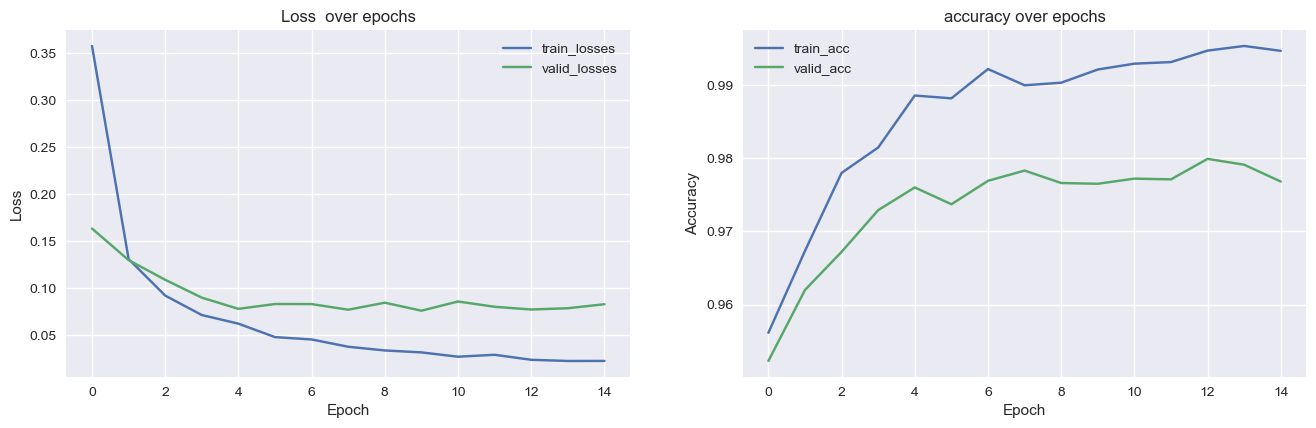

In [33]:
plot_performance(performance_2)

The loss of training data is dropping from 0.35 to 0.02, while the loss of testing data is dropping from 0.16 to 0.08

The accuracy of training data is rising from 0.95 to 0.994, while the loss of testing data is between 0.95 and 0.98

## 3.4.1 3.4.2

In [34]:
def find_trainable_parameter(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [35]:
print("number of trainable parameters of LeNet:", find_trainable_parameter(LeNet5_model))
print("number of trainable parameters of MLP:",find_trainable_parameter(MLP_model))

number of trainable parameters of LeNet: 61706
number of trainable parameters of MLP: 280058


## 3.4.3

LeNet has better performance than MLP in terms of prediction accuracy on the test data. The final accuracy is about 0.985~0.99 on LeNet and is lower than 0.98 on MLP. LeNet has better performance because it uses convolution layers to focus on small areas to collect patterns in the picture; while MLP don't, it will waste a lot of neurons on calculating relationships between two distant points in the graph. Hence, LeNet can give us better performance.

## 4. Statement of Collaboration
Sabina Yang- Discussed about implementation fo LeNet5 in pytorch